# [Astropy](https://www.astropy.org/)
\
![Astropy](https://docs.astropy.org/en/stable/_static/astropy_banner.svg)
\
`astropy` ontains a lot of functions and tools for working with astronomical data.

In the documentation, you can read that the package has functions related to:
* data structures and transformations, including constants, units, time and date, coordinates
* file handling (I/O): ASCII tables, FITS files, VOTable
* calculations: cosmology, signal convolution and filtering, data visualization, astrostatistics.

# Table of Contents

1. [Data Structure](#data_structure)
    * [Constants and Units](#const_and_units)
        - [Exercise 1](#ex1)
    * [Time Handling](#timedate)
    * [Coordinates](#coordinates)
2. [File Handling](#files)
    * [Opening FITS files](#fits)
    * [Display - normalization](#norm)
    * [WCS](#wcs)
    * [Adding images](#add)
    * [Make RGB image](#rgb)
    * [Simple and fast aperture photometry](#aperture)
3. [Astroquery](#astroquery)

# Importing and setting up the notebook (to be executed first!)

In [88]:
# import astropy as ap
import numpy as np

# we will need to plot stuff later
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=data_structure></a>
# 1. Data structure

<a id=const_and_units></a>
## Constants and Units

In [89]:
import astropy.constants as const
import astropy.units as u

In [90]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [91]:
print(const.c)
print("-----------------------")
print(const.c.cgs)
print(type(const.c))
print(const.c.to("pc/yr"))  # unit conversion

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
-----------------------
29979245800.0 cm / s
<class 'astropy.constants.codata2018.CODATA2018'>
0.30660139378555057 pc / yr


In [92]:
g = (const.G * const.M_earth) / (const.R_earth) ** 2
print(g)

9.798398133669465 m / s2


In [93]:
print(const.g0.value)

9.80665


In [94]:
(g*80*u.kg).to(u.N)

<Quantity 783.87185069 N>

In [95]:
dir(const)

['Constant',
 'EMConstant',
 'G',
 'GM_earth',
 'GM_jup',
 'GM_sun',
 'L_bol0',
 'L_sun',
 'M_earth',
 'M_jup',
 'M_sun',
 'N_A',
 'R',
 'R_earth',
 'R_jup',
 'R_sun',
 'Ryd',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'a0',
 'alpha',
 'atm',
 'au',
 'b_wien',
 'c',
 'cgs',
 'codata',
 'codata2018',
 'config',
 'constant',
 'e',
 'eps0',
 'g0',
 'h',
 'hbar',
 'iau2015',
 'iaudata',
 'k_B',
 'kpc',
 'm_e',
 'm_n',
 'm_p',
 'mu0',
 'muB',
 'pc',
 'si',
 'sigma_T',
 'sigma_sb',
 'u',
 'utils']

In [96]:
# (0.8 * u.arcsec).to(u.parsec)
# print((0.5 * u.arcsec).to(u.parsec, equivalencies=u.parallax()))
print((6568 * u.Angstrom).to(u.GHz, equivalencies=u.spectral()))

456444.0590742996 GHz


In [97]:
haler = u.def_unit("haler") # defining own units
czk = u.def_unit("czk", 100*haler)
2.49*czk.to(haler)

249.00000000000003

In [98]:
fortnight = u.def_unit('fortnight', 14 * u.day)
const.c.to("lyr/fortnight")

<Quantity 0.03832991 lyr / fortnight>

<a id="ex1"></a>
### Exercise 1

Calculate the speed of Earth in km/s around the Sun (assuming a circular orbit). Use the formula below and the following modules: `constants` and `units`:

$$v = \sqrt{\frac{G M_{\odot}}{r}}$$

In [99]:
V_e = np.sqrt(const.GM_sun/const.au)
V_e.to("km/s")

<Quantity 29.78469183 km / s>

<a id="timedate"></a>
## Time Handling

In [100]:
from astropy.time import Time

In [101]:
times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00']
t = Time(times, format='isot', scale='utc')
print(t)

['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']


In [102]:
t[1]

<Time object: scale='utc' format='isot' value=2010-01-01T00:00:00.000>

In [103]:
t = Time(times)
t

<Time object: scale='utc' format='isot' value=['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']>

In [104]:
t.jd

array([2451179.50000143, 2455197.5       ])

In [105]:
t.mjd

array([51179.00000143, 55197.        ])

In [106]:
nt = Time.now() # current time
print(nt)
nt.sidereal_time('apparent', 'greenwich') 

2023-05-15 16:45:33.958162


<Longitude 8.30300365 hourangle>

In [107]:
nt = Time.now() # current time
t = Time(nt, scale='utc', location=('17d', '51.1d'))
print(t)
t.sidereal_time('apparent')

2023-05-15 16:45:34.095271


<Longitude 9.43637518 hourangle>

<a id="coordinates"></a>
## Coordinates

In [108]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon

`astropy.coordinates.SkyCoord.from_name` uses Simbad to search objects by name

Let's search coorindates for NGC6823:

In [109]:
obj_name = "NGC6823"
obj = SkyCoord.from_name(obj_name)

In [110]:
obj

<SkyCoord (ICRS): (ra, dec) in deg
    (295.794, 23.321)>

Let's use `astropy.coordinates.EarthLocation` to create a `location` object with data about the observing site. Let's take the Białków Observatory as an example.


In [111]:
bialkow = EarthLocation(lat=51.476111*u.deg, lon=16.656667*u.deg, height=130*u.m)
# utcoffset = 1*u.hour  # winter time offset
utcoffset = 0*u.hour
time = Time.now()
time

<Time object: scale='utc' format='datetime' value=2023-05-15 16:45:35.113609>

Let's convert coorinates  to `AltAz`(imuthal) at the obesrving site

In [112]:
obj_altaz = obj.transform_to(AltAz(obstime=time,location=bialkow))
print(obj_altaz.alt)

-11d57m11.92795443s


In [113]:
y, m, d, _, _, _ = time.ymdhms
midnight = Time(str(y)+'-'+str(m)+'-'+str(d)+'T00:00:00') + utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
delta_midnight
night = AltAz(obstime=midnight+delta_midnight, location=bialkow)
obj_altaz = obj.transform_to(night)

In [114]:
obj_altaz

<SkyCoord (AltAz: obstime=['2023-05-14T12:00:00.000' '2023-05-14T12:01:26.486'
 '2023-05-14T12:02:52.973' ... '2023-05-15T11:57:07.027'
 '2023-05-15T11:58:33.514' '2023-05-15T12:00:00.000'], location=(3813772.66208279, 1141043.35710066, 4966809.18911154) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(3.17325051e+02, -4.38918268e+00), (3.17620703e+02, -4.54131020e+00),
     (3.17916860e+02, -4.69257911e+00), (3.18213524e+02, -4.84298389e+00),
     (3.18510696e+02, -4.99251902e+00), (3.18808378e+02, -5.14117898e+00),
     (3.19106571e+02, -5.28895827e+00), (3.19405276e+02, -5.43585136e+00),
     (3.19704495e+02, -5.58185273e+00), (3.20004228e+02, -5.72695686e+00),
     (3.20304477e+02, -5.87115824e+00), (3.20605242e+02, -6.01445134e+00),
     (3.20906525e+02, -6.15683067e+00), (3.21208326e+02, -6.29829069e+00),
     (3.21510646e+02, -6.43882591e+00), (3.21813486e+02, -6.57843081e+00),
     (3.22116846e+02, -6.71709990e+00), (3

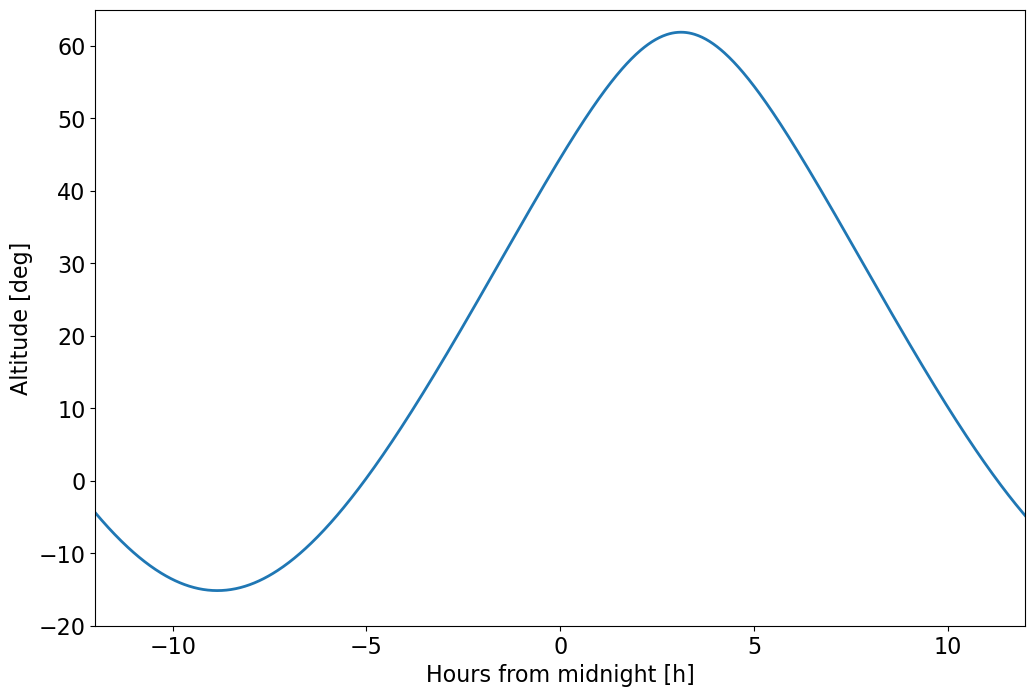

In [115]:
plt.plot(delta_midnight, obj_altaz.alt)
plt.xlim(-12, 12)
plt.ylim(-20, 65)
plt.xlabel('Hours from midnight [h]')
plt.ylabel('Altitude [deg]')
plt.show()

In [116]:
sun_altaz = get_sun(midnight+delta_midnight).transform_to(night)
moon_altaz = get_moon(midnight+delta_midnight).transform_to(night)

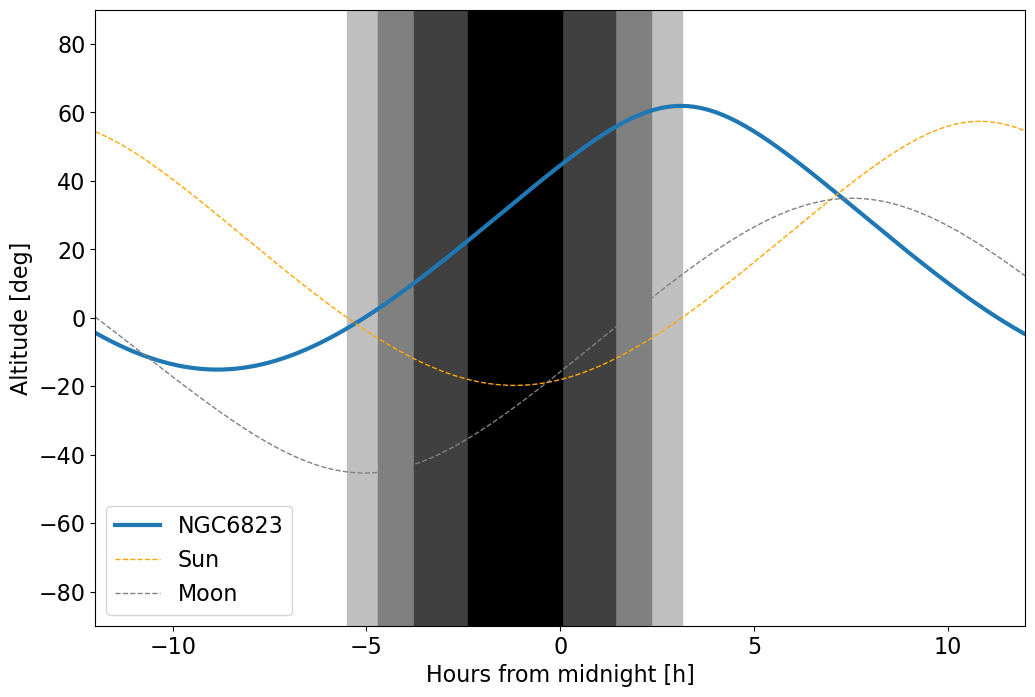

In [117]:
plt.plot(delta_midnight, obj_altaz.alt, lw=3, label=obj_name)
plt.plot(delta_midnight, sun_altaz.alt, color="orange", ls="--", lw=1, label="Sun")
plt.plot(delta_midnight, moon_altaz.alt, color="gray", ls="--", lw=1, label="Moon")
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt < -0*u.deg, color='0.75')
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt < -6*u.deg, color='0.5')
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt < -12*u.deg, color='0.25')
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt < -18*u.deg, color='k')
plt.xlim(-12, 12)
plt.ylim(-90, 90)
plt.xlabel('Hours from midnight [h]')
plt.ylabel('Altitude [deg]')
plt.legend(loc='lower left')
plt.show()

# 2. File Handling

<a id="fits"></a>
## Opening FITS files

In [2]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt

In [9]:
dirpath = os.path.join("data")
inputfile = "NGC6823_UDF_I.fits"
data, header = fits.getdata(os.path.join(dirpath, inputfile), header=True)

In [10]:
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1274 / Axis length                                    
NAXIS2  =                 1204 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2016-08-18T18:11:07' / Date FITS file was generated                  
IRAF-TLM= '2016-08-18T18:11:07' / Time of last modification                     
OBJECT  = 'NGC6823_udf'        / Name of the object observed                    
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.361100000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '        

In [11]:
fitsfile = fits.open(os.path.join(dirpath, inputfile))

In [12]:
print(fitsfile.info())

Filename: data/NGC6823_UDF_I.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (1274, 1204)   float32   
None


In [13]:
print(fitsfile[0].data)

[[49.700947 49.58479  50.029335 ... 50.       50.       50.      ]
 [49.696255 49.834743 49.769985 ... 51.69669  52.43843  53.907944]
 [49.42985  49.839935 50.060055 ... 50.80438  51.32024  52.4276  ]
 ...
 [50.491436 50.933304 51.319073 ... 49.72702  49.00031  49.861195]
 [50.17665  51.264587 50.67725  ... 50.376556 49.018456 49.44455 ]
 [49.4424   50.158897 50.417183 ... 50.01275  49.347786 49.21324 ]]


In [14]:
print(fitsfile[0].header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 1274 / Axis length                                    NAXIS2  =                 1204 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2016-08-18T18:11:07' / Date FITS file was generated                  IRAF-TLM= '2016-08-18T18:11:07' / Time of last modification                     OBJECT  = 'NGC6823_udf'        / Name of the object observed                    EQUINOX =        2000.00000000 / Mean equinox                                   MJD-OBS =   5.361100000000E+04 / Modified Julian date at start                  RADESYS = 'ICRS    '           / Astrome

In [22]:
with fits.open(os.path.join(dirpath, inputfile), mode='update') as filehandle:
#     filehandle[0].header.pop('MYHDRKW')
    filehandle[0].header['MYHDRKW']='My Header Keyword'

In [24]:
# filehandle[0].header['MYHDRKW'] # uncomment

<a id="norm"></a>
## Display - normalization

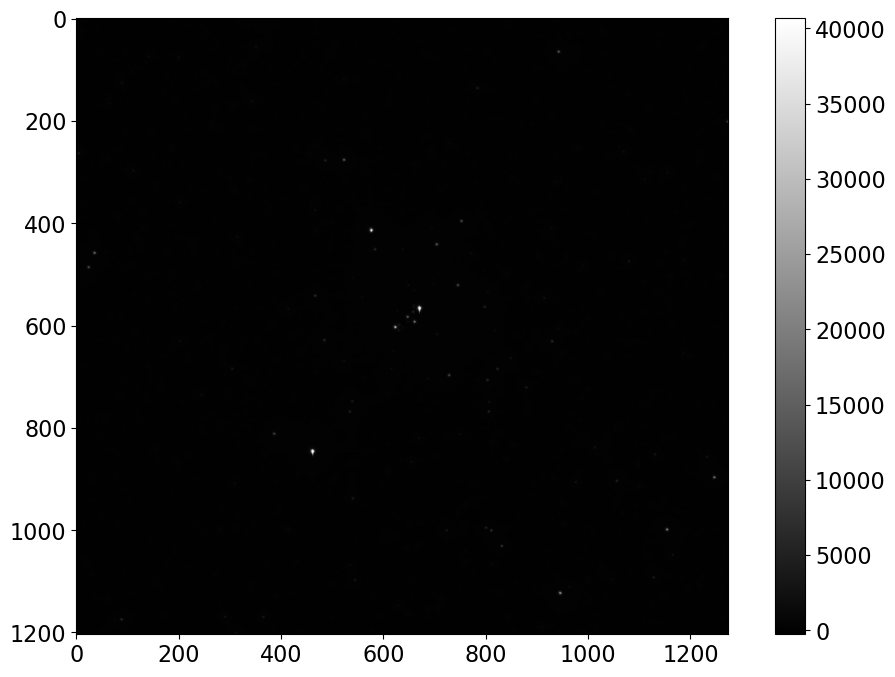

In [126]:
plt.imshow(fitsfile[0].data, cmap='gray')
plt.colorbar()

In [127]:
from matplotlib.colors import LogNorm

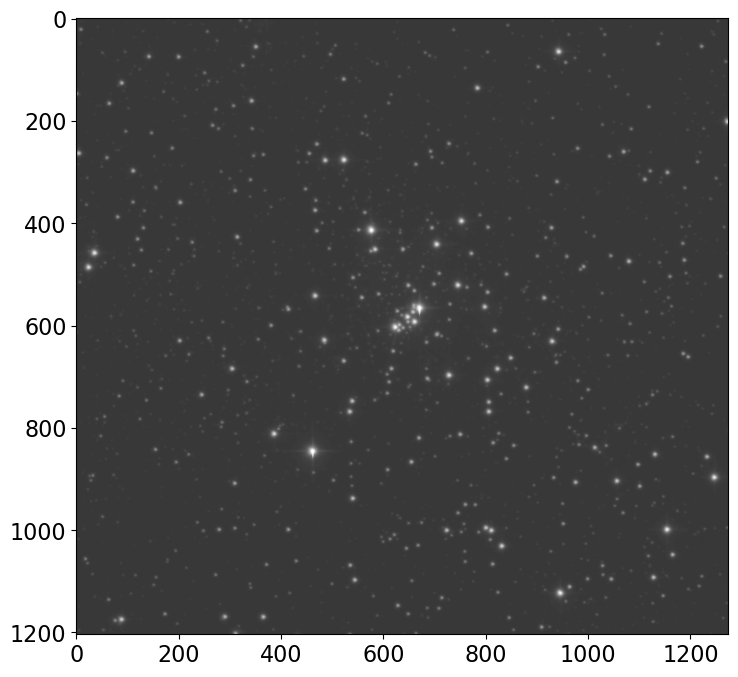

In [128]:
plt.imshow(fitsfile[0].data, cmap='gray', norm=LogNorm())

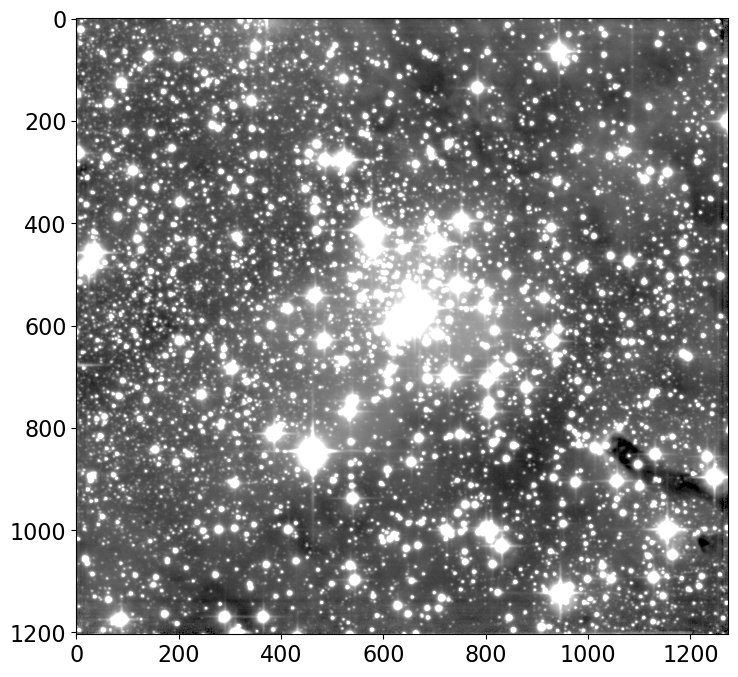

In [129]:
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize, ZScaleInterval

norm = ImageNormalize(fitsfile[0].data, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(fitsfile[0].data, cmap='gray', norm=norm)

<a id="wcs"></a>
## WCS

In [298]:
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import Quadrangle
from astropy.visualization.wcsaxes import add_scalebar
from matplotlib.patches import Circle, Rectangle

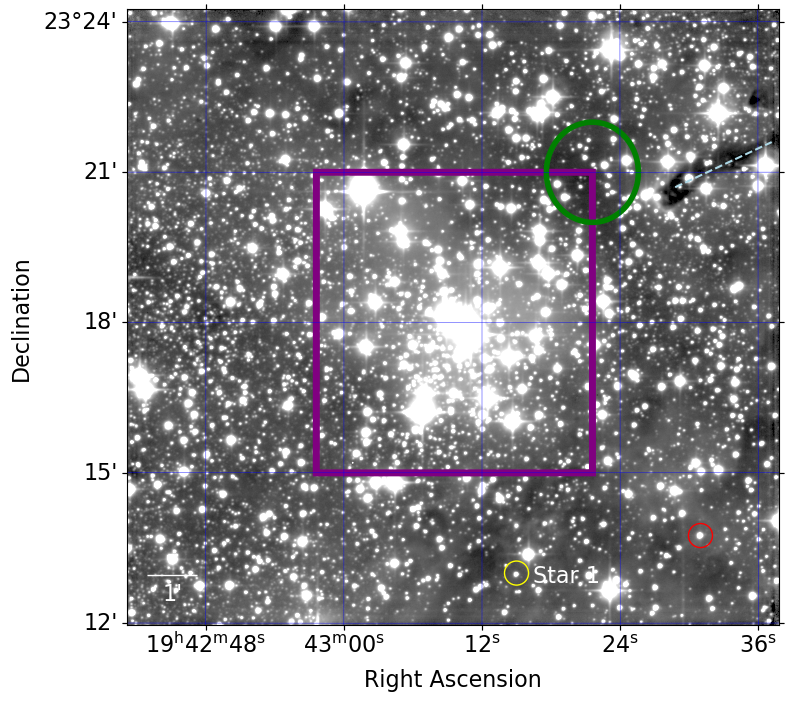

In [425]:
hdu = fitsfile[0]
wcs = WCS(hdu.header)
ax = plt.subplot(projection=wcs)
norm = ImageNormalize(fitsfile[0].data, interval=ZScaleInterval(), stretch=SqrtStretch())
ax.imshow(hdu.data, cmap='gray', norm=norm)
ax.grid(color='blue', ls='solid', lw=0.3)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

# ax.set_autoscale_on(False)

# pixels
ax.scatter(1120, 175, s=300, edgecolor='red', facecolor='none')
# RA, DEC in degrees
ax.scatter(295.8125000, 23.2166667, s=300, edgecolor='yellow', facecolor='none', transform=ax.get_transform('fk5'))
ax.text(295.8185000, 23.21366667, 'Star 1', transform=ax.get_transform('fk5'), color='white')

#Quadrangle
r = Quadrangle((295.84, 23.35)*u.deg, -0.1*u.deg, -0.1*u.deg, lw=5,
               edgecolor='purple', facecolor='none',
               transform=ax.get_transform('fk5'))
ax.add_patch(r)

c = Circle((295.84, 23.35), 1/60, edgecolor='green', facecolor='none', lw=4,
           transform=ax.get_transform('fk5'))
ax.add_patch(c)

line = plt.Line2D((295.87, 295.905)*u.deg, (23.345, 23.36)*u.deg, ls='--', lw=1.5, color='lightblue',
                  transform=ax.get_transform('fk5'))
ax.add_line(line)

# Add a scale bar
scalebar_angle = 1*u.arcmin
add_scalebar(ax, scalebar_angle, label="1'", color="white", corner='bottom left', )

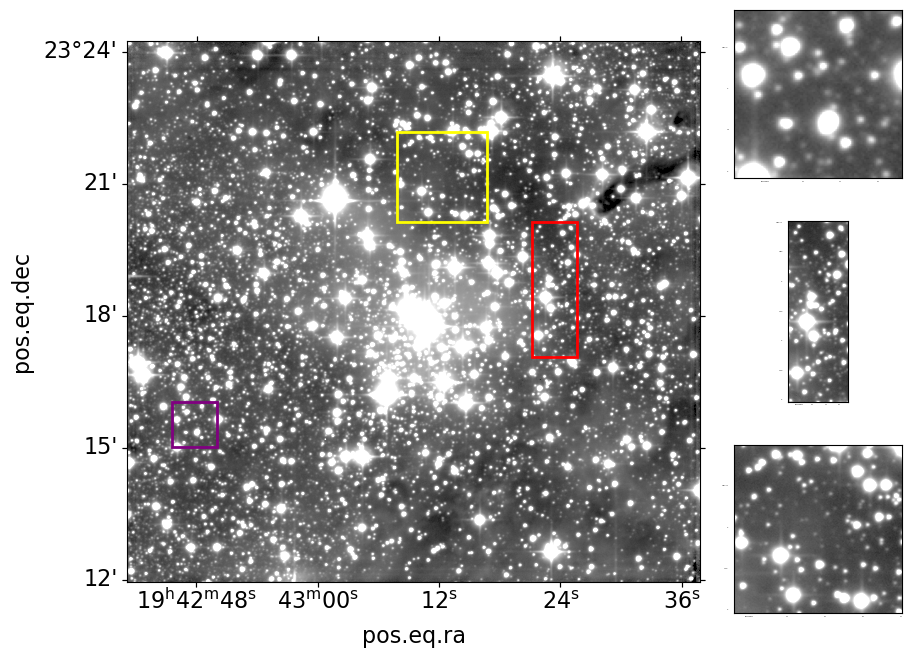

In [398]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 8))

# Define the grid
gs = GridSpec(3, 4, figure=fig)

hdu = fitsfile[0]
wcs = WCS(hdu.header)
norm = ImageNormalize(fitsfile[0].data, interval=ZScaleInterval(), stretch=SqrtStretch())


# Define the subplots
ax1 = fig.add_subplot(gs[0:3, 0:3], projection=wcs)
ax2 = fig.add_subplot(gs[0, 3], projection=wcs)
ax3 = fig.add_subplot(gs[1, 3], projection=wcs)
ax4 = fig.add_subplot(gs[2, 3], projection=wcs)


# Set the titles
# ax1.set_title('Plot 1')
# ax2.set_title('Plot 2')
# ax3.set_title('Plot 3')
# ax4.set_title('Plot 4')

ax1.imshow(hdu.data, cmap='gray', norm=norm)


ax2.imshow(hdu.data[300:400, 100:200], cmap='gray', norm=norm)
r1 = Rectangle((100, 300), 100, 100, lw=2,
               edgecolor='purple', facecolor='none')
ax1.add_patch(r1)


ax3.imshow(hdu.data[500:800, 900:1000], cmap='gray', norm=norm)
r2 = Rectangle((900, 500), 100, 300, lw=2,
               edgecolor='red', facecolor='none')
ax1.add_patch(r2)


ax4.imshow(hdu.data[800:1000, 600:800], cmap='gray', norm=norm)
r1 = Rectangle((600, 800), 200, 200, lw=2,
               edgecolor='yellow', facecolor='none')
ax1.add_patch(r1)


for ax in [ax2, ax3, ax4]:
    ax.tick_params(labelsize=0, length=0, width=0)
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    
# Show the figure
plt.show()

<a id="rgb"></a>
## Make RGB image

#### APLpy can work on different fits sizes

In [26]:
import aplpy
aplpy.make_rgb_cube(['data/I_coadd.fits', 'data/V_coadd.fits', 'data/B_coadd.fits'], 'data/BVI_cube.fits')

In [28]:
aplpy.make_rgb_image('data/BVI_cube.fits','data/BVI_rgb.png')

# aplpy.make_rgb_image('data/BVI_cube.fits','data/BVI_rgb.png',
#                       vmin_r=0., vmax_r=100.,
#                       vmin_g=0., vmax_g=100.,
#                       vmin_b=0., vmax_b=100.,
#                       vmin_r=-3., vmax_r=100.,
#                       vmin_g=-1., vmax_g=100.,
#                       vmin_b=2., vmax_b=100.,
#                       stretch_r='sqrt',
#                       stretch_g='sqrt',
#                       stretch_b='sqrt')

INFO: Red: [aplpy.rgb]
INFO: vmin = -6.339e+00 (auto) [aplpy.rgb]
INFO: vmax =  9.975e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin = -5.774e+00 (auto) [aplpy.rgb]
INFO: vmax =  1.266e+02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin = -6.622e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.196e+02 (auto) [aplpy.rgb]


b'<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:avm="http://www.communicatingastronomy.org/avm/1.0/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:x="adobe:ns:meta/"><rdf:RDF><rdf:Description><avm:MetadataVersion>1.1000000000000001</avm:MetadataVersion><avm:Spatial.CoordinateFrame>ICRS</avm:Spatial.CoordinateFrame><avm:Spatial.Equinox>nan</avm:Spatial.Equinox><avm:Spatial.ReferenceValue><rdf:Bag><rdf:li>269.6346979468099789</rdf:li><rdf:li>66.6379225921539984</rdf:li></rdf:Bag></avm:Spatial.ReferenceValue><avm:Spatial.ReferenceDimension><rdf:Bag><rdf:li>1321.0000000000000000</rdf:li><rdf:li>1219.0000000000000000</rdf:li></rdf:Bag></avm:Spatial.ReferenceDimension><avm:Spatial.ReferencePixel><rdf:Bag><rdf:li>660.6278316957200332</rdf:li><rdf:li>611.0399175845999480</rdf:li></rdf:Bag></avm:Spatial.ReferencePixel><avm:Spatial.Scale><rdf:Bag><rdf:li>-0.0001701033179415</rdf:li><rdf:li>0.0001701033179415</rdf:li></rdf:Bag></avm:Spatial.Scale

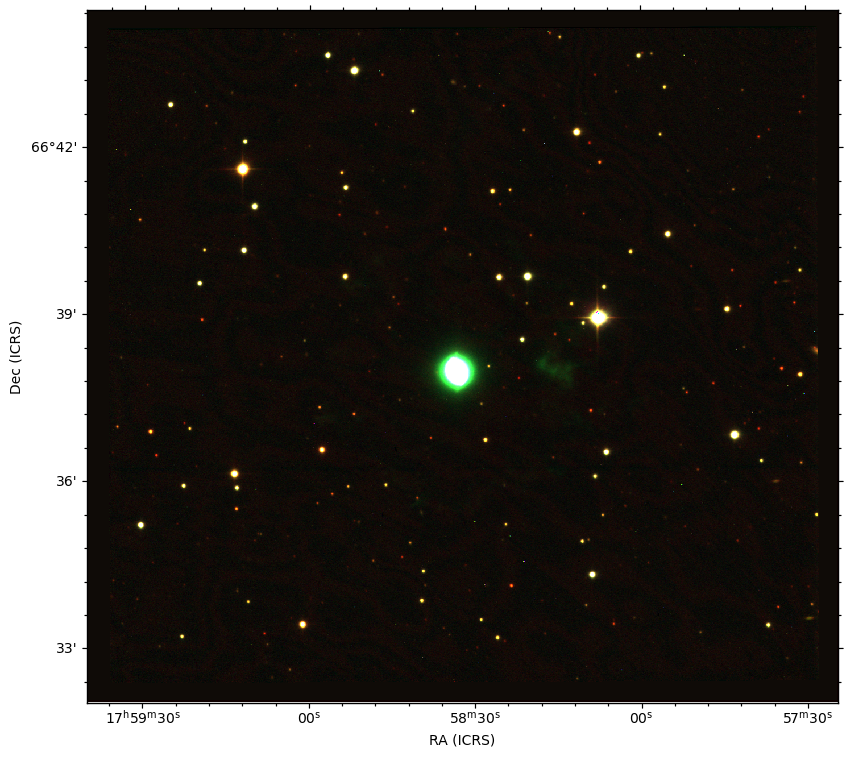

In [29]:
f = aplpy.FITSFigure('data/BVI_rgb.png')
f.show_rgb()

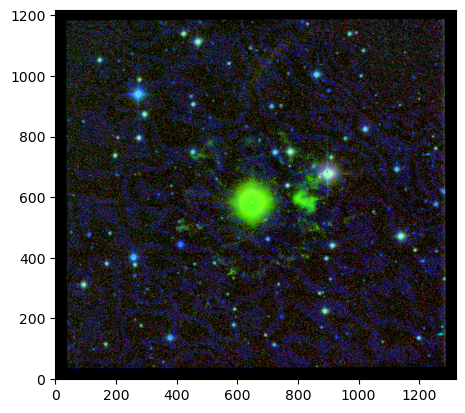

In [30]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
%matplotlib inline

b = fits.open('data/b.fits')[0].data
g = fits.open('data/g.fits')[0].data
r = fits.open('data/r.fits')[0].data
rgb_default = make_lupton_rgb(r, g, b, filename="default.jpeg")
# rgb_default = make_lupton_rgb(r, g, b, minimum=[1,1,1], Q=10, stretch=20, filename="default.jpeg")

plt.imshow(rgb_default, origin='lower')

<a id="add"></a>
## Adding images

In [47]:
image_list = [os.path.join(dirpath,"M13_blue_000"+str(n)+".fits") for n in range(1, 5+1)]
image_concat = [fits.getdata(image) for image in image_list]

In [48]:
image_concat

[array([[489, 474, 519, ..., 447, 541, 519],
        [517, 508, 489, ..., 517, 490, 499],
        [500, 453, 518, ..., 537, 514, 537],
        ...,
        [449, 490, 519, ..., 469, 508, 541],
        [500, 521, 514, ..., 502, 478, 549],
        [480, 516, 535, ..., 494, 527, 491]], dtype=uint16),
 array([[494, 529, 549, ..., 492, 535, 560],
        [540, 530, 479, ..., 484, 514, 496],
        [500, 517, 514, ..., 520, 518, 552],
        ...,
        [498, 515, 509, ..., 527, 533, 531],
        [499, 495, 505, ..., 521, 447, 541],
        [513, 541, 522, ..., 522, 521, 472]], dtype=uint16),
 array([[517, 475, 503, ..., 515, 531, 531],
        [521, 434, 489, ..., 575, 484, 499],
        [492, 498, 516, ..., 535, 486, 512],
        ...,
        [504, 506, 515, ..., 486, 538, 518],
        [497, 536, 509, ..., 521, 485, 539],
        [560, 515, 573, ..., 520, 506, 541]], dtype=uint16),
 array([[487, 490, 546, ..., 478, 522, 522],
        [496, 533, 505, ..., 513, 511, 486],
        [551,

In [49]:
final_image = np.zeros(shape=image_concat[0].shape)

In [50]:
for image in image_concat:
    final_image += image

In [51]:
final_image

array([[2492., 2448., 2631., ..., 2422., 2655., 2650.],
       [2592., 2518., 2460., ..., 2583., 2497., 2478.],
       [2569., 2504., 2566., ..., 2562., 2505., 2660.],
       ...,
       [2373., 2465., 2544., ..., 2503., 2551., 2619.],
       [2330., 2539., 2541., ..., 2570., 2389., 2662.],
       [2653., 2533., 2645., ..., 2595., 2619., 2505.]])

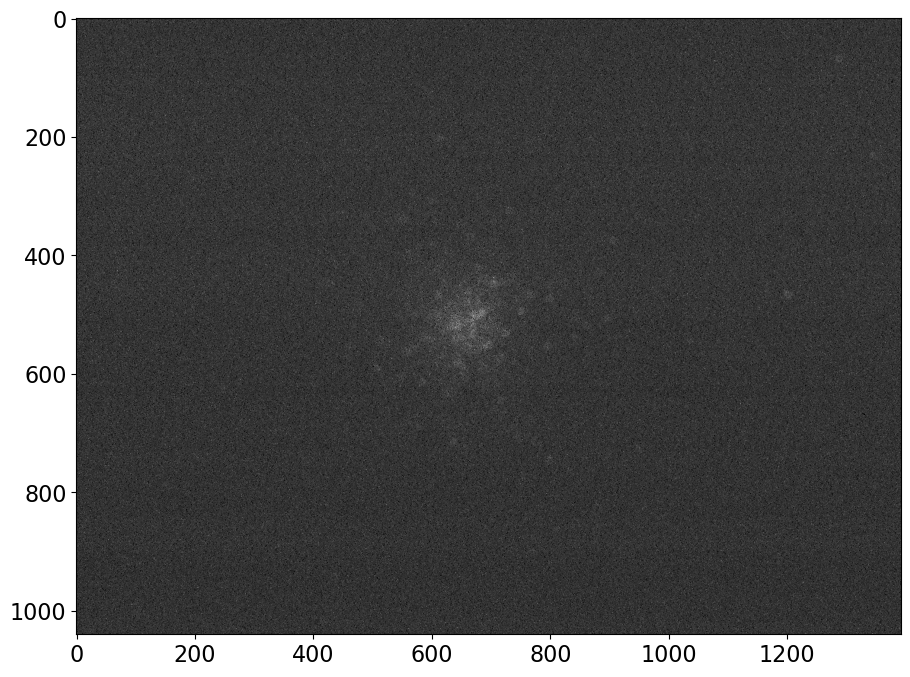

In [52]:
from astropy.visualization.stretch import SinhStretch, LinearStretch

norm = ImageNormalize(image_concat[0], interval=ZScaleInterval(), stretch=SinhStretch())

plt.imshow(image_concat[0], cmap='gray', norm=norm)

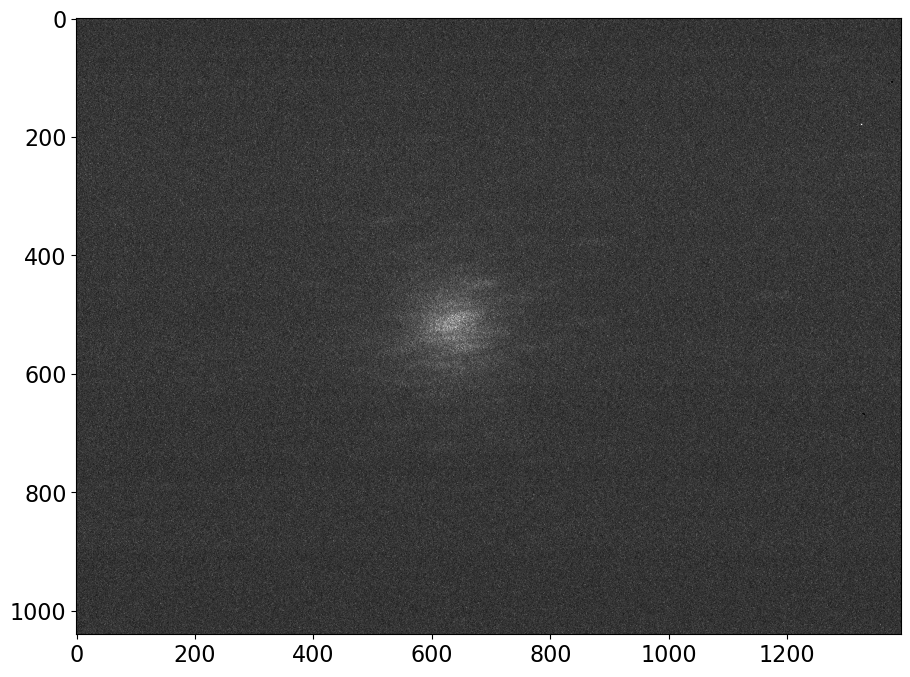

In [53]:
norm = ImageNormalize(final_image, interval=ZScaleInterval(), stretch=SinhStretch())

plt.imshow(final_image, cmap='gray', norm=norm)

<a id="aperture"></a>
## Simple and fast aperture photometry

In [100]:
inputfile = "HST.fits"
hst = fits.open(os.path.join(dirpath, inputfile))
hst_image = hst[0].data[0]
hst_image -= np.median(hst_image)

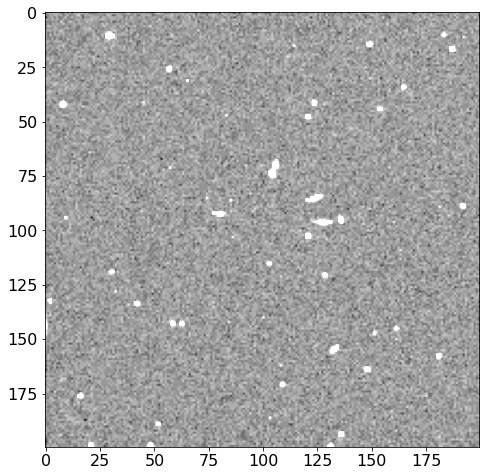

In [101]:
norm = ImageNormalize(hst_image, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(hst_image, cmap='gray', norm=norm)

In [102]:
# conda install -c conda-forge photutils
# pip install photutils

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(hst_image)  
daofind = DAOStarFinder(fwhm=1., threshold=3. * bkg_sigma)  
sources = daofind(hst_image)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id xcentroid ycentroid sharpness    roundness1    roundness2  npix sky    peak      flux        mag     
--- --------- --------- ---------- ------------- ------------- ---- --- --------- --------- -------------
  1  154.3921 2.6294776 0.96668362    0.21755155  -0.011555147   25   0 3.0481665 1.0016747 -0.0018168135
  2 28.055047 10.438071 0.92126992   -0.44542609    -0.5675036   25   0 957.42664 247.10142    -5.9821881
  3  182.9815 9.9287851 0.98126767   -0.12249027  -0.010627297   25   0 98.207985 27.269781    -3.5892041
  4 193.01468 11.198598 0.99118143  -0.087089083  -0.026656528   25   0 4.9572077 1.3140017   -0.29648983
  5 148.62036 14.186897 0.97040786   -0.28280677   -0.14441231   25   0 275.19772 75.331538    -4.6924421
  6 114.33588 14.856605 0.99220428    0.23644609  -0.064523703   25   0 13.035855 3.5793474    -1.3845096
  7 186.84903 16.416154 0.97350816    0.51493743    0.21372956   25   0 305.06717 82.983368    -4.7974776
  8 56.744032 26.137503 0.96809273    0.147945

In [105]:
from photutils.aperture import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=5.)  
phot_table = aperture_photometry(image, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1  154.3921 2.6294776    34567.733
  2 28.055047 10.438071    39581.978
  3  182.9815 9.9287851    39888.067
  4 193.01468 11.198598    39869.263
  5 148.62036 14.186897    39634.968
  6 114.33588 14.856605    39944.778
  7 186.84903 16.416154    39799.515
  8 56.744032 26.137503     39926.77
  9 64.926944  31.16492    39961.977
 10 164.42523  34.03539    40172.319
 11 44.905749 41.679991    39866.241
 12 123.37093 41.223412    39871.904
 13 7.9497106 41.983715    39636.689
 14 154.06184 43.973992    40092.929
...       ...       ...          ...
 35 62.665176 142.86786    40219.079
 36 161.04807 145.01069    39883.285
 37 151.06561 147.03612    39559.075
 38 132.61861 154.80073    40266.842
 39 180.78074 157.78648     40015.83
 40 107.74162 161.51264    39572.354
 41 147.41102 163.83547    40241.501
 42 108.88996  170.9079    39970.699
 43 15.118192 175.96856     39901.25
 

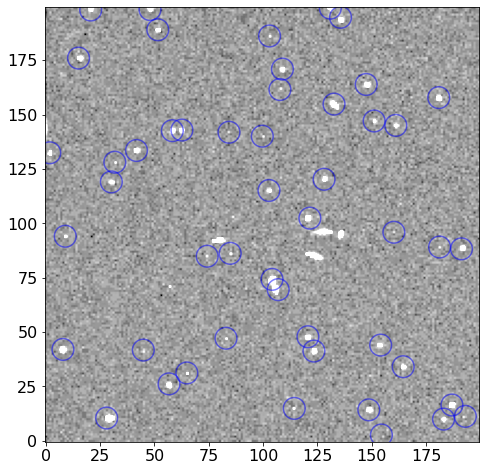

In [106]:
import matplotlib.pyplot as plt
plt.imshow(hst_image, cmap='gray', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5);

<a id="astroquery"></a>
# [Astroquery](https://astroquery.readthedocs.io/en/latest/)

### Simbad

In [ ]:
from astroquery.simbad import Simbad

result_table = Simbad.query_object("NGC6823")
result_table.pprint()

In [ ]:
result_table

In [ ]:
from astropy import coordinates
import astropy.units as u

c = coordinates.SkyCoord("05h35m17.3s -05d23m28s", frame='icrs')

r = 5 * u.arcminute

result_table = Simbad.query_region(c, radius=r)

result_table.pprint(show_unit=True, max_width=80, max_lines=5)

In [ ]:
# result_table

In [ ]:
result_table = Simbad.query_object("m [1-9]", wildcard=True)

print(result_table)

### Vizier

In [5]:
from astroquery.vizier import Vizier
from astropy.coordinates import Angle
from astroquery.vizier import Conf
# Conf.row_limit = -1
Vizier.ROW_LIMIT = -1

result = Vizier.query_region("NGC6823", radius=Angle(0.1, "deg"), catalog='I/355/gaiadr3')
# result = Vizier.query_region("NGC6823", radius="0d6m0s", catalog='I/355/gaiadr3')
# result = Vizier.query_region("NGC6823", radius=0.1*u.deg, catalog='I/355/gaiadr3')
result

TableList with 1 tables:
	'0:I/355/gaiadr3' with 57 column(s) and 2617 row(s) 

In [20]:
result = Vizier(catalog="III/135A", columns=["HD","_RA.icrs","_DEC.icrs","Ptg"], row_limit=-1).query_constraints(Ptg="5.0..6.0")
result

TableList with 1 tables:
	'0:III/135A/catalog' with 5 column(s) and 1968 row(s) 